# Contours 

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

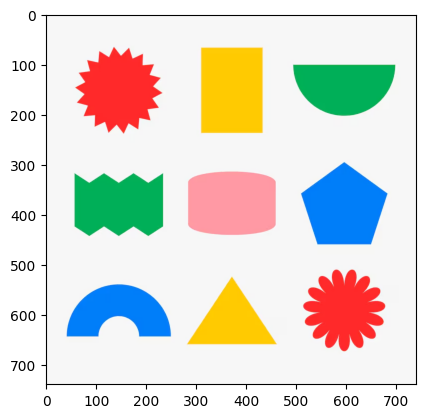

In [2]:
# Read image 
image = cv.imread("./images/shapes.jpg")

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.imshow(image_rgb)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


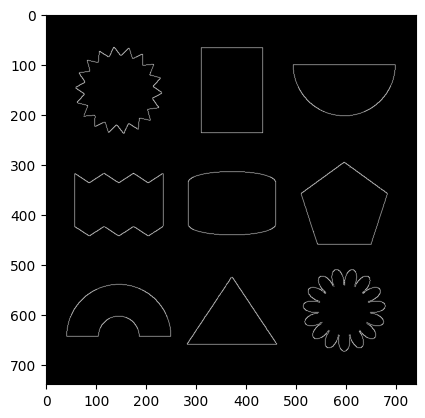

In [ ]:
# Find boundaries and bounding box
# First I need to find a binary mask with Thresholding or Canny detector 

# We work on grayscale to use canny 
canny_gray = cv.Canny(image_grey,
         80, 150, #threshold of gradient intensity (we look for values in between)
         )

plt.imshow(canny_gray, cmap='grey')
print(canny_gray) # Binary mask over edges 

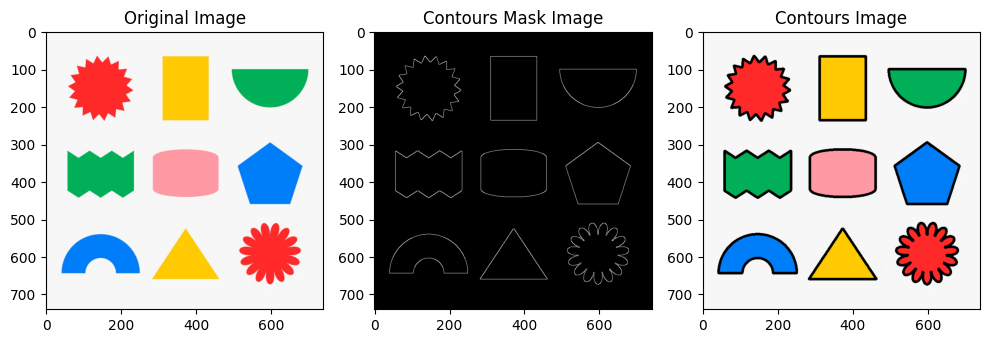

In [6]:
# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures better results
contours, hierarchy = cv.findContours(canny_gray,
                cv.RETR_LIST,           # (mode) control retrieval mode :  determine hierarchical relationship between contours
                cv.CHAIN_APPROX_SIMPLE, # (method) compress horiz-vertical-diagonal segments, storing only external points : decide how contours points are stored
                )

# plot contours on original image copy
# (contours list stores x,y for each shape as point)
image_contours = image.copy()
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                5          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(canny_gray, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()




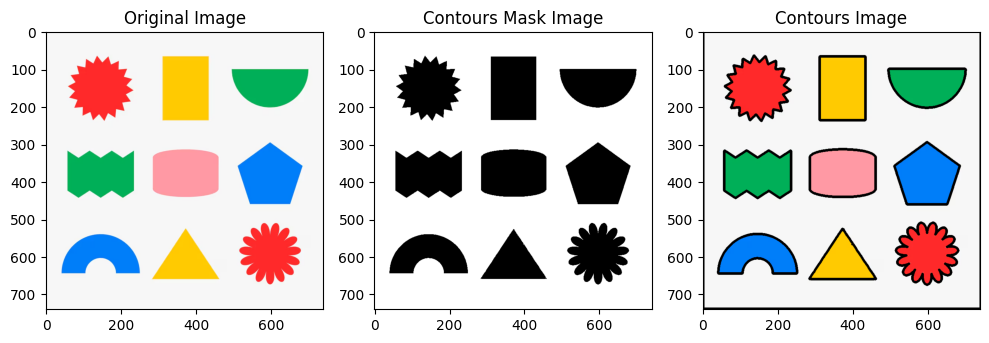

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [11]:
# Using this contours, many details can be extracted (object numbers, bounding boxes, areas, etc

# Contour detection iwth a different method (thresholding instead of canny)
retval, binary_thresh = cv.threshold(image_grey,
         200, # threshold value, all higher values are treathed differently (made white)
         255,
         cv.THRESH_BINARY # create binary mask
         )

# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures bet# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures better results
contours, hierarchy = cv.findContours(binary_thresh,
                cv.RETR_LIST,           # (mode) control retrieval mode :  determine hierarchical relationship between contours
                cv.CHAIN_APPROX_SIMPLE, # (method) compress horiz-vertical-diagonal segments, storing only external points : decide how contours points are stored
                )

# plot contours on original image copy
# (contours list stores x,y for each shape as point)
image_contours = image.copy()
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                5          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(binary_thresh, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()

# Instead of edge detection, we highlight all pixels which are not white (below threshold)
# Anything above 200 is made white (255), while all the rest is as 0 (black) -> binary mask 0 1

print(binary_thresh)

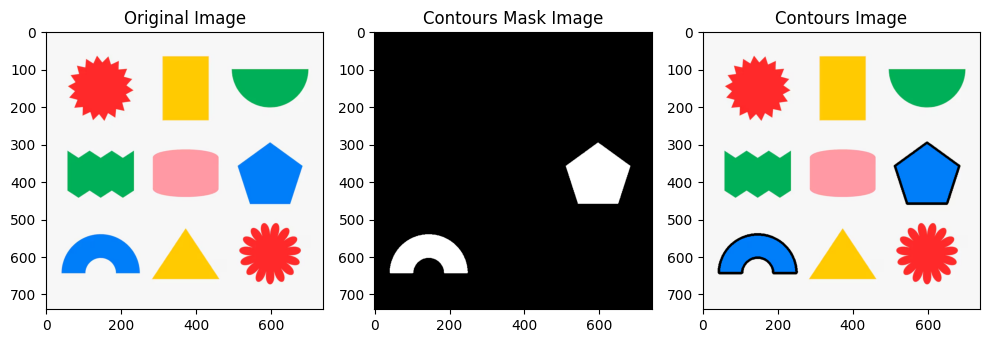

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# How to work directly in colored image (not on grey scale)

# Instead of using grey threshold, using inrange function
# This will depend on your image 
# Targetting only objects with some shape

import math
def hsv2cv(h, s, v):
    cv_h = math.floor(h * 179/360)
    cv_s = math.floor(s * 255/100)
    cv_v = math.floor(v * 255/100)
    
    return [cv_h, cv_s, cv_v]

lower_bound = np.array(hsv2cv(190, 60,30), dtype=np.uint8)
upper_bound = np.array(hsv2cv(220, 100, 100), dtype=np.uint8)

# work with HSV image in thresholding color
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# To target only some colors in my original hsv image range (lower, upper)
# related to H color ring... 
mask = cv.inRange(image_hsv, lower_bound, upper_bound)

# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures bet# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures better results
contours, hierarchy = cv.findContours(mask,
                cv.RETR_LIST,           # (mode) control retrieval mode :  determine hierarchical relationship between contours
                cv.CHAIN_APPROX_SIMPLE, # (method) compress horiz-vertical-diagonal segments, storing only external points : decide how contours points are stored
                )

# plot contours on original image copy
# (contours list stores x,y for each shape as point)
image_contours = image.copy()
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                5          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()

# Instead of edge detection, we highlight all pixels which are not white (below threshold)
# Anything above 200 is made white (255), while all the rest is as 0 (black) -> binary mask 0 1

print(mask)


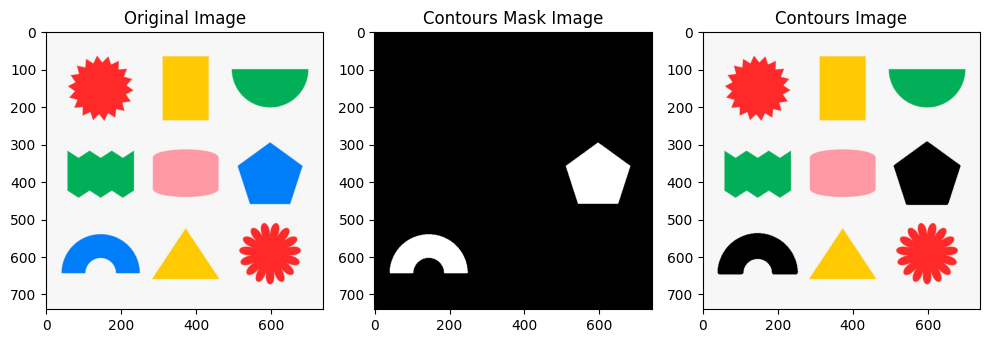

In [28]:
# How to use the boundary in a better way, such as filling the object (using -1 in thickness)
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                -1          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()

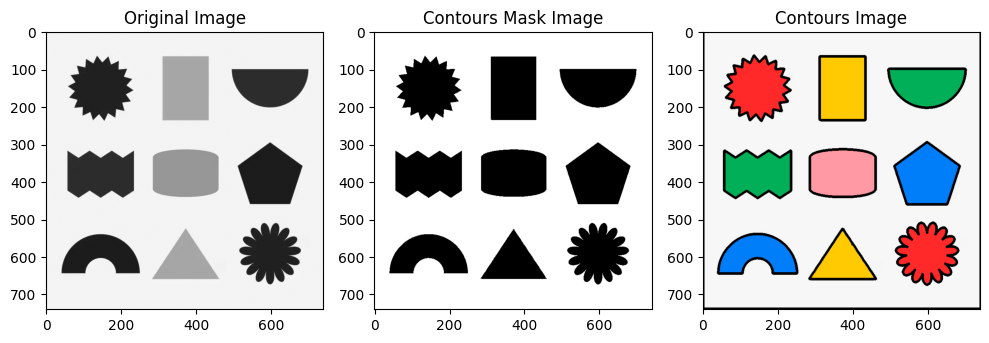

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [29]:
# How to use inRange directly in grayscale ? 

# define lower/upper in single channel
lower_bound = np.array([200], dtype=np.uint8)
upper_bound = np.array([255], dtype=np.uint8)

# Target color in grayscale as intensity 
mask = cv.inRange(image_grey, lower_bound, upper_bound)

# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures bet# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures better results
contours, hierarchy = cv.findContours(mask,
                cv.RETR_LIST,           # (mode) control retrieval mode :  determine hierarchical relationship between contours
                cv.CHAIN_APPROX_SIMPLE, # (method) compress horiz-vertical-diagonal segments, storing only external points : decide how contours points are stored
                )

# plot contours on original image copy
# (contours list stores x,y for each shape as point)
image_contours = image.copy()
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                5          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()

# Instead of edge detection, we highlight all pixels which are not white (below threshold)
# Anything above 200 is made white (255), while all the rest is as 0 (black) -> binary mask 0 1

print(mask)


In [46]:
# How to draw bounding box using contours

# How to use inRange directly in grayscale ? 

# define lower/upper in single channel
lower_bound = np.array([200], dtype=np.uint8)
upper_bound = np.array([255], dtype=np.uint8)

# Target color in grayscale as intensity 
mask = cv.inRange(image_grey, lower_bound, upper_bound)

# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures bet# The output of canny edge detector is a boundary as edges, not contours iteself (edges)
# We use the contour detection 
# A better binary mask ensures better results
contours, hierarchy = cv.findContours(mask,
                cv.RETR_LIST,           # (mode) control retrieval mode :  determine hierarchical relationship between contours
                cv.CHAIN_APPROX_SIMPLE, # (method) compress horiz-vertical-diagonal segments, storing only external points : decide how contours points are stored
                )

# first we sort the contours 
sorted_contours = sorted(contours,
       key=cv.contourArea, # sort based on the shape area
       reverse=True)

print(len(sorted_contours))

# remove the largest contours (the overall image contours)
contours = sorted_contours[1:10]

# print bounding boxes 
image_contours = image.copy()

for contour in contours: 
    x,y,w,h = cv.boundingRect(contour) # make a bounding box around the polygon
    cv.rectangle(image_contours,(x,y), (x+w, y+h), (255,0,0), 3)

10


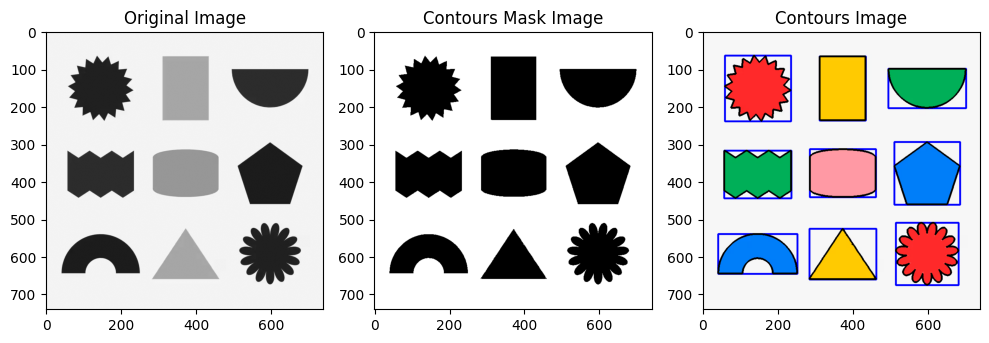

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [47]:
# plot contours on original image copy
# (contours list stores x,y for each shape as point)
cv.drawContours(image_contours, contours,
                -1,        # index of the contours (-1 means plot all of them)
                (0,0,0), # contours color
                3          # thickness
                )

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("Contours Mask Image")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(image_contours, cv.COLOR_BGR2RGB))
plt.title("Contours Image")

plt.tight_layout()
plt.show()

# Instead of edge detection, we highlight all pixels which are not white (below threshold)
# Anything above 200 is made white (255), while all the rest is as 0 (black) -> binary mask 0 1

print(mask)

(198, 1, 2)
[[[310  68]]

 [[311  67]]

 [[431  67]]

 [[432  68]]

 [[432 236]]

 [[431 237]]

 [[313 237]]

 [[312 236]]

 [[311 236]]

 [[310 235]]]


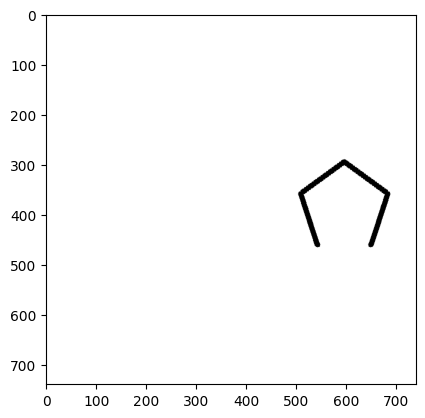

In [ ]:
# Visualize the contours points

print(contour.shape)
print(contours[0][:])

height, width = image.shape[0], image.shape[1]
white = (255, 255, 255)       # background of the canva

canvas = np.full((height, width, 3), white, dtype=np.uint8)

for points in contours[2][:]:
    cv.circle(canvas, (points[0][0], points[0][1]), 5,
          color=(0,0,0),
          thickness=-1)
    
plt.imshow(canvas)
